In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
mnist_data = tf.keras.datasets.mnist
(train_x, train_y),(test_x, test_y) = mnist_data.load_data()

11490434/11490434 [==============================] - 1s 0us/step


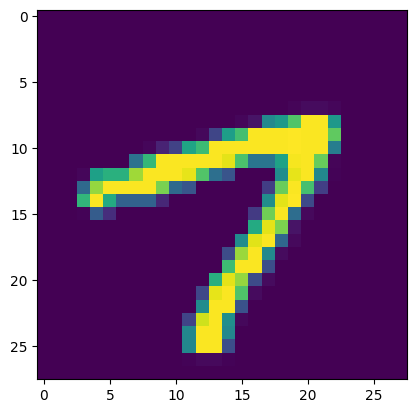

In [3]:
plt.imshow(train_x[101])

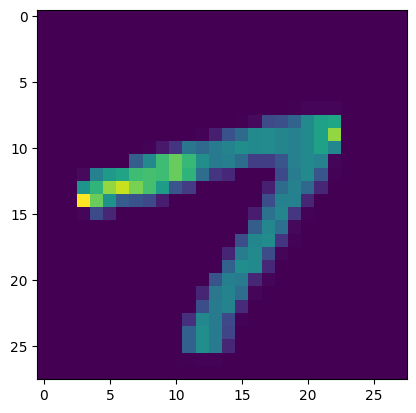

In [4]:
train_x = tf.keras.utils.normalize(train_x, axis=1)
test_x = tf.keras.utils.normalize(test_x, axis=1)
plt.imshow(train_x[101])

In [5]:
train_x = train_x.reshape(train_x.shape[0] , 28 ,28 ,1)
test_x = test_x.reshape(test_x.shape[0] , 28 ,28 ,1)

In [6]:
model = Sequential()


model.add(Conv2D(64 , (3,3) , input_shape = train_x.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(64 , (3,3) , input_shape = train_x.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(64 , (3,3) , input_shape = train_x.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Flatten())
model.add(Dense(10))
model.add(Activation("softmax"))

model.compile(optimizer = "adam" , loss = "categorical_crossentropy" , metrics = ["accuracy"])
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 activation (Activation)     (None, 26, 26, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 activation_1 (Activation)   (None, 11, 11, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                    

In [7]:
train_y = to_categorical(train_y)
test_y = to_categorical(test_y)

In [8]:
history = model.fit(train_x , train_y, epochs = 10 , validation_data = (test_x,test_y))

Epoch 1/10
1875/1875 [==============================] - 15s 4ms/step - loss: 0.2377 - accuracy: 0.9277 - val_loss: 0.1315 - val_accuracy: 0.9603
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0813 - accuracy: 0.9756 - val_loss: 0.0714 - val_accuracy: 0.9795
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0604 - accuracy: 0.9812 - val_loss: 0.0576 - val_accuracy: 0.9833
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0477 - accuracy: 0.9852 - val_loss: 0.0591 - val_accuracy: 0.9844
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0380 - accuracy: 0.9885 - val_loss: 0.0518 - val_accuracy: 0.9861
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0299 - accuracy: 0.9904 - val_loss: 0.0535 - val_accuracy: 0.9840
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0253 - accuracy: 0.9918 - val_loss: 0.0498 - val_accuracy

In [9]:
test_loss, test_accuracy = model.evaluate(test_x, test_y)

# Making predictions using the trained model on the test data (test_x)
predictions = model.predict(test_x)

313/313 [==============================] - 1s 2ms/step


In [10]:
print("Test loss on 10000 test sample ", test_loss)
print("Validation Accuracy on 10000 test sample ", test_accuracy)

Test loss on 10000 test sample  0.05633861571550369
Validation Accuracy on 10000 test sample  0.9873999953269958
